# AI-Crashkurs

## Inhalt

1. Tensorflow
1. Keras
1. MNIST Beispiel

### Tensorflow
 
 - Tensorflow ist/war eine Low Level API
     - Kernels für CPU, GPU, TPU
     - C++ Library
     - Python Implementation nutzt C++
     - Low Level API: tf.layers, tf.losses, tf.metrics ...
     - High Level API: Estimators, Importer, Eager Execution
 - die Implementierung erfolgt ohne Kenntnis der verwendeten Kernels
 - alle Funktionen sind in allen Kernels implementiert (wenn möglich)
 

### Tensorboard

- Visualisierung des Lernens/Graphens

### Keras

- High Level API
- Abstraktion von der verwendeten ML-Library

### MNIST

- GoTo Beispiel
- handgeschriebene Ziffern
- Trainingsset 60.000
- Testset 10.000
- (SD-1 - high-school students)
- (SD-3 - Einwohnermeldeamtmitarbeiter - besser zu lesen)
- Vorverarbeitet!


- http://yann.lecun.com/exdb/mnist/
- https://keras.io/datasets/#mnist-database-of-handwritten-digits

    pip install tensorflow

![MNIST Ziffern](https://cdn-images-1.medium.com/max/1600/1*av47vApmzuM0AN21VaIcSA.png)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

2021-09-10 07:56:59.276872: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-10 07:57:00.376678: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22846 MB memory:  -> device: 0, name: TITAN RTX, pci bus id: 0000:af:00.0, compute capability: 7.5
2021-09-10 07:57:00.377866: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9653 MB memory:  -> device: 1, name: GeForce RTX 2080 Ti, pci bus id: 0000:86:00.0, compute capability: 7.5
2021-09-10 07:57:01.322058: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (r

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2211 - accuracy: 0.9356
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0980 - accuracy: 0.9706
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0702 - accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0542 - accuracy: 0.9828
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9760


[0.07510734349489212, 0.9760000109672546]

![Relu](https://upload.wikimedia.org/wikipedia/commons/6/6c/Rectifier_and_softplus_functions.svg)

Compiliert unseren Code auf die CPU oder GPU ohne den Overhead des Python-Interpreters

- Loss-Funktion: "Wie weit ist unsere Lösung von der richtigen Lösung entfernt?"
- Accuracy: Korrekte Vorhersage/Alle Vorhersagen
- Optimizer: z.B. Gradient-Descent; aber Adam ist in vielen Fällen besser

- Confusion Matrix

![Confusion Matrix](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2014/03/truth_table.png)

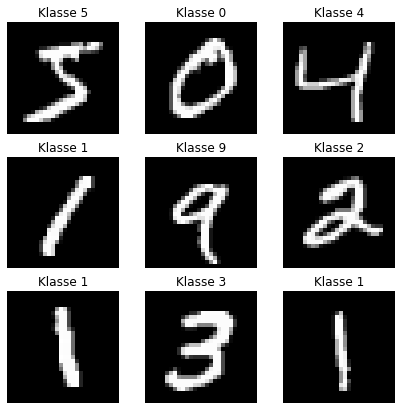

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.axis('off')
    plt.title("Klasse {}".format(y_train[i]))

In [4]:
predicted = model.predict(x_test)
predicted_classes = np.argmax(predicted, axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [5]:
print(str(len(x_test)) + ' Testbeispiele')
print()
print(str(len(correct_indices)) + ' korrekt')
print(str(len(incorrect_indices)) + ' inkorrekt')

10000 Testbeispiele

9760 korrekt
240 inkorrekt


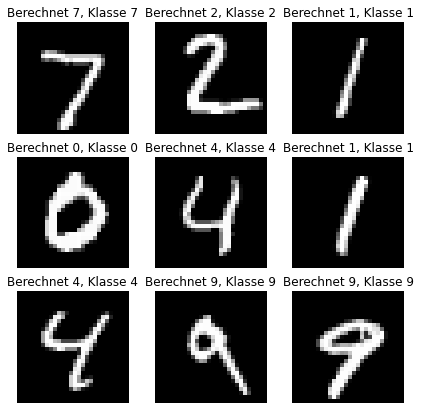

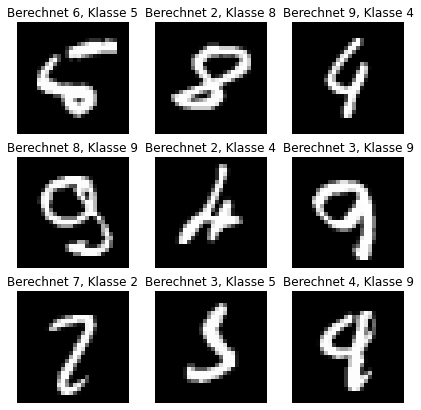

In [6]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Berechnet {}, Klasse {}".format(predicted_classes[correct], y_test[correct]))
    plt.axis('off')
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Berechnet {}, Klasse {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.axis('off')